In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
df=pd.read_csv("forestfires.csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
df.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [ ]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
df.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [ ]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
# Dropping unneccsary columns
df = df.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec',
              'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct','monthsep'],
             axis = 1)
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


size_category,large,small
area,,
0.00,0,247
0.09,0,1
0.17,0,1
0.21,0,1
0.24,0,1
...,...,...
200.94,1,0
212.88,1,0
278.53,1,0


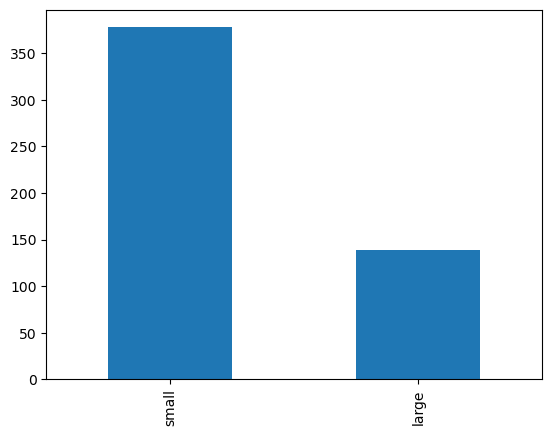

In [ ]:
df.size_category.value_counts().plot(kind='bar')

pd.crosstab(df.area, df.size_category)


<AxesSubplot:xlabel='month', ylabel='Count'>

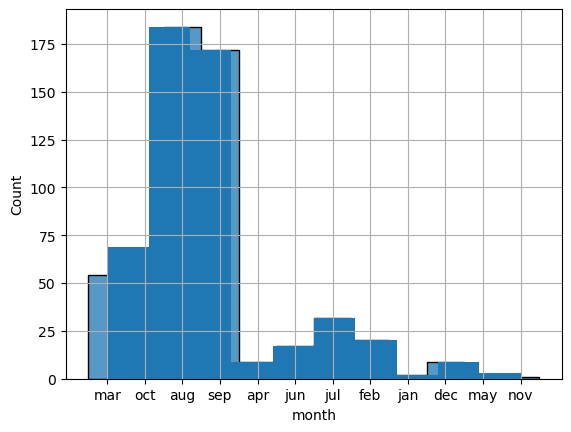

In [ ]:
# EDA
#histogram
sns.histplot(df["month"])
df["month"].hist()

<AxesSubplot:xlabel='size_category', ylabel='Count'>

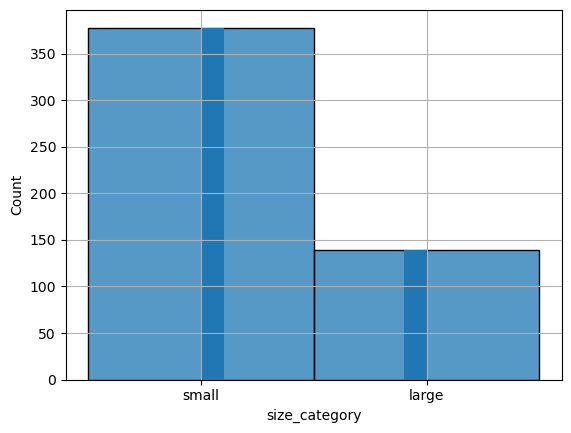

In [ ]:
sns.histplot(df["size_category"])
df["size_category"].hist()

<AxesSubplot:xlabel='day', ylabel='Count'>

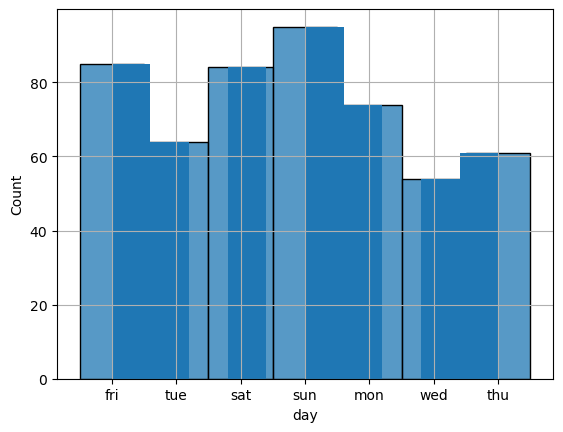

In [ ]:
sns.histplot(df["day"])
df["day"].hist()

<AxesSubplot:xlabel='DMC', ylabel='Count'>

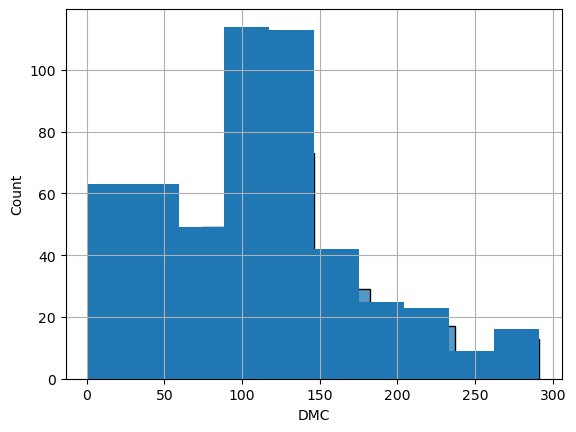

In [ ]:
sns.histplot(df["DMC"])
df["DMC"].hist()

<AxesSubplot:xlabel='wind', ylabel='Count'>

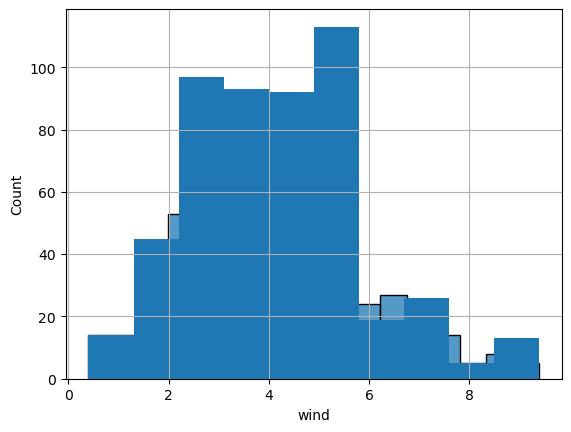

In [ ]:
sns.histplot(df["wind"])
df["wind"].hist()

<AxesSubplot:xlabel='rain', ylabel='Count'>

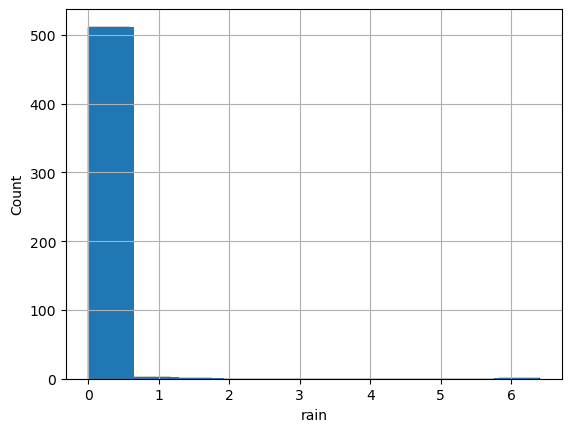

In [ ]:
sns.histplot(df["rain"])
df["rain"].hist()

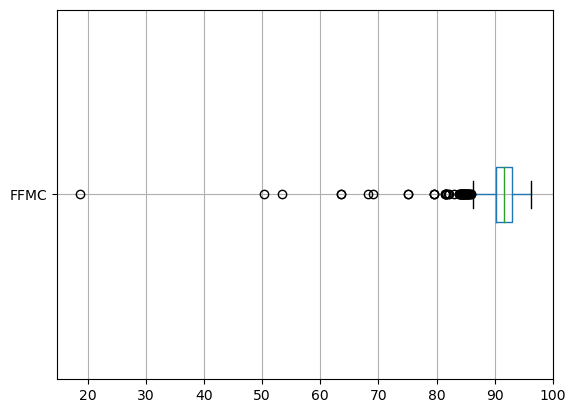

In [ ]:
# Boxplots
df.boxplot("FFMC",vert=False)
Q1=np.percentile(df["FFMC"],25)
Q3=np.percentile(df["FFMC"],75)
IQR=Q3-Q1
LW=Q1-(2.0*IQR)
UW=Q3+(2.0*IQR)
df["FFMC"]<LW
df[df["FFMC"]<LW]
df[df["FFMC"]<LW].shape
df["FFMC"]>UW
df[df["FFMC"]>UW]
df[df["FFMC"]>UW].shape
df["FFMC"]=np.where(df["FFMC"]>UW,UW,np.where(df["FFMC"]<LW,LW,df["FFMC"]))

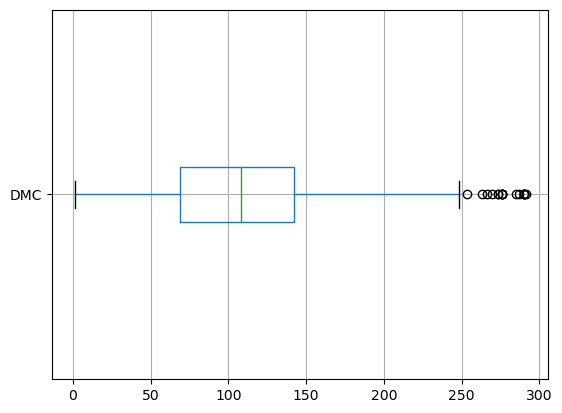

In [ ]:
df.boxplot("DMC",vert=False)
Q1=np.percentile(df["DMC"],25)
Q3=np.percentile(df["DMC"],75)
IQR=Q3-Q1
LW=Q1-(2.0*IQR)
UW=Q3+(2.0*IQR)
df["DMC"]<LW
df[df["DMC"]<LW]
df[df["DMC"]<LW].shape
df["DMC"]>UW
df[df["DMC"]>UW]
df[df["DMC"]>UW].shape
df["DMC"]=np.where(df["DMC"]>UW,UW,np.where(df["DMC"]<LW,LW,df["DMC"]))

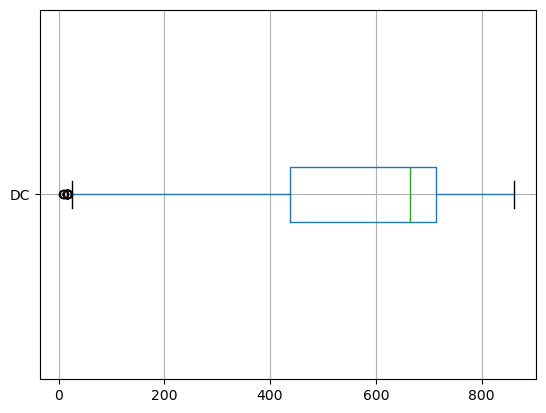

In [ ]:
df.boxplot("DC",vert=False)
Q1=np.percentile(df["DC"],25)
Q3=np.percentile(df["DC"],75)
IQR=Q3-Q1
LW=Q1-(2.0*IQR)
UW=Q3+(2.0*IQR)
df["DC"]<LW
df[df["DC"]<LW]
df[df["DC"]<LW].shape
df["DC"]>UW
df[df["DC"]>UW]
df[df["DC"]>UW].shape
df["DC"]=np.where(df["DC"]>UW,UW,np.where(df["DC"]<LW,LW,df["DC"]))

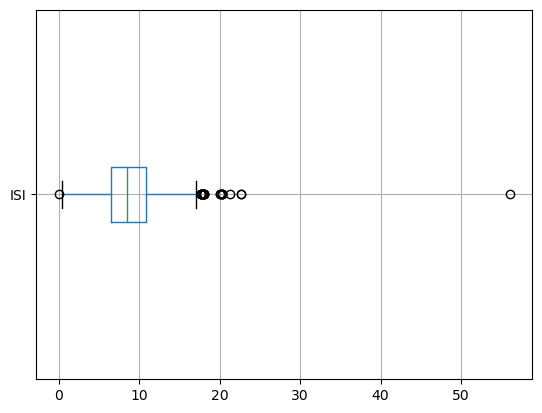

In [ ]:
df.boxplot("ISI",vert=False)
Q1=np.percentile(df["ISI"],25)
Q3=np.percentile(df["ISI"],75)
IQR=Q3-Q1
LW=Q1-(2.0*IQR)
UW=Q3+(2.0*IQR)
df["ISI"]<LW
df[df["ISI"]<LW]
df[df["ISI"]<LW].shape
df["ISI"]>UW
df[df["ISI"]>UW]
df[df["ISI"]>UW].shape
df["ISI"]=np.where(df["ISI"]>UW,UW,np.where(df["ISI"]<LW,LW,df["ISI"]))

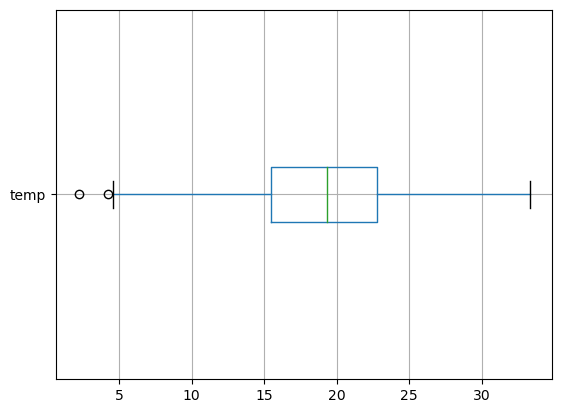

In [ ]:
df.boxplot("temp",vert=False)
Q1=np.percentile(df["temp"],25)
Q3=np.percentile(df["temp"],75)
IQR=Q3-Q1
LW=Q1-(2.0*IQR)
UW=Q3+(2.0*IQR)
df["temp"]<LW
df[df["temp"]<LW]
df[df["temp"]<LW].shape
df["temp"]>UW
df[df["temp"]>UW]
df[df["temp"]>UW].shape
df["temp"]=np.where(df["temp"]>UW,UW,np.where(df["temp"]<LW,LW,df["temp"]))

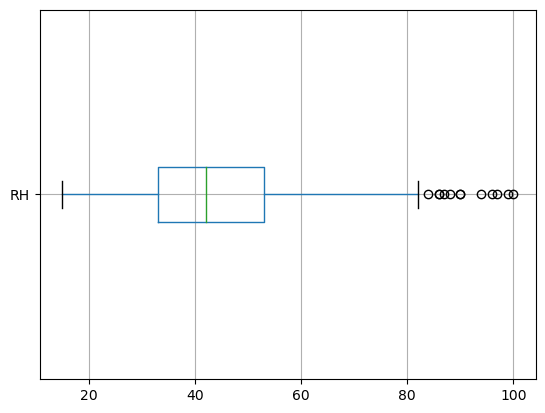

In [ ]:
df.boxplot("RH",vert=False)
Q1=np.percentile(df["RH"],25)
Q3=np.percentile(df["RH"],75)
IQR=Q3-Q1
LW=Q1-(2.0*IQR)
UW=Q3+(2.0*IQR)
df["RH"]<LW
df[df["RH"]<LW]
df[df["RH"]<LW].shape
df["RH"]>UW
df[df["RH"]>UW]
df[df["RH"]>UW].shape
df["RH"]=np.where(df["RH"]>UW,UW,np.where(df["RH"]<LW,LW,df["RH"]))

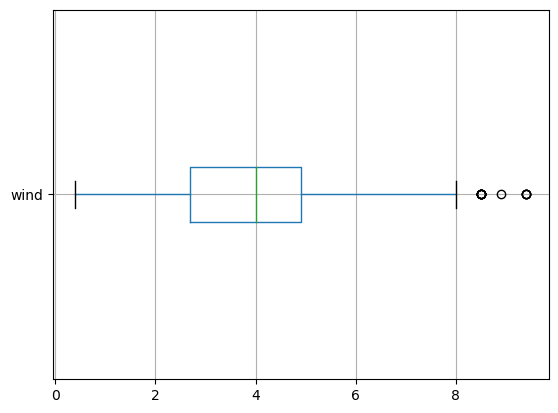

In [ ]:
df.boxplot("wind",vert=False)
Q1=np.percentile(df["wind"],25)
Q3=np.percentile(df["wind"],75)
IQR=Q3-Q1
LW=Q1-(2.0*IQR)
UW=Q3+(2.0*IQR)
df["wind"]<LW
df[df["wind"]<LW]
df[df["wind"]<LW].shape
df["wind"]>UW
df[df["wind"]>UW]
df[df["wind"]>UW].shape
df["wind"]=np.where(df["wind"]>UW,UW,np.where(df["wind"]<LW,LW,df["wind"]))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'countplot for days'),
 Text(0.5, 0, 'days'),
 Text(0, 0.5, 'count')]

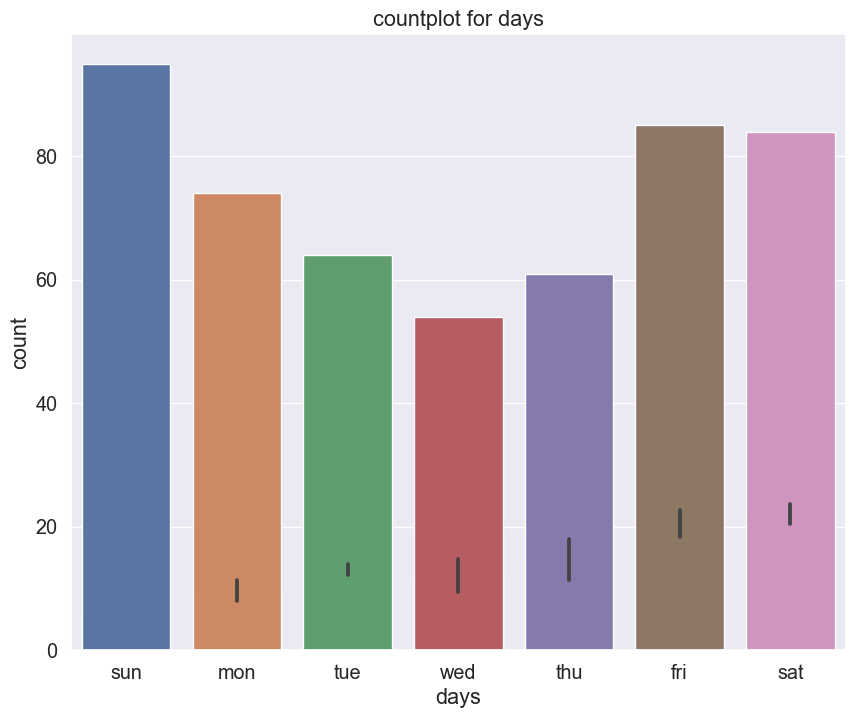

In [ ]:
#Bar plot
# Plotting Month Vs. temp plot
plt.rcParams['figure.figsize'] = [10, 8]
sns.set(style = "darkgrid", font_scale = 1.3)
monthtemp = sns.barplot(x = 'month', y = 'temp', data = df,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'winter');
monthtemp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");

plt.rcParams['figure.figsize'] = [10, 8]
sns.set(style = "darkgrid", font_scale = 1.3)
day = sns.countplot(df["day"],order = ['sun','mon','tue','wed','thu','fri','sat'])
day.set(title="countplot for days",xlabel='days',ylabel='count')

Text(0.5, 1.0, 'HeatMap of Features for the Classes')

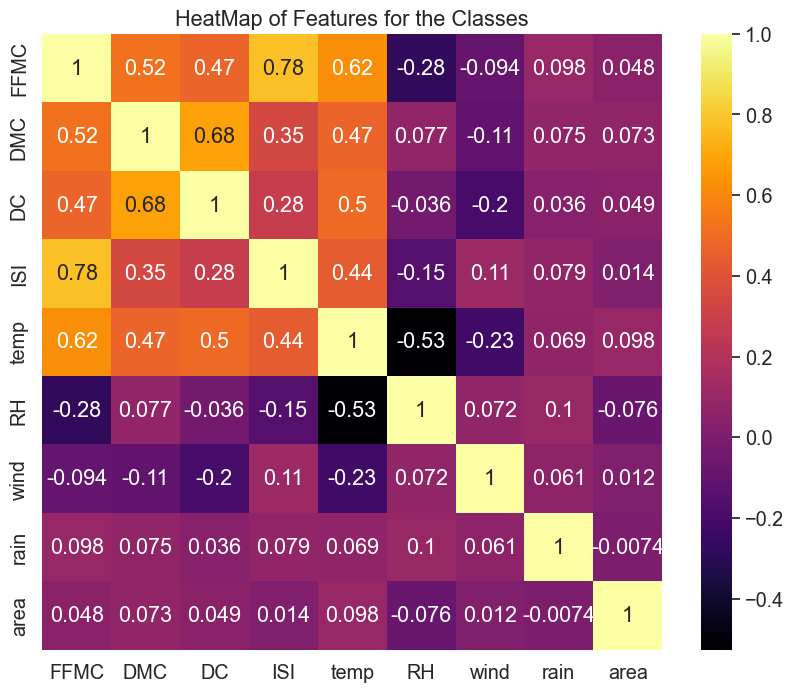

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")

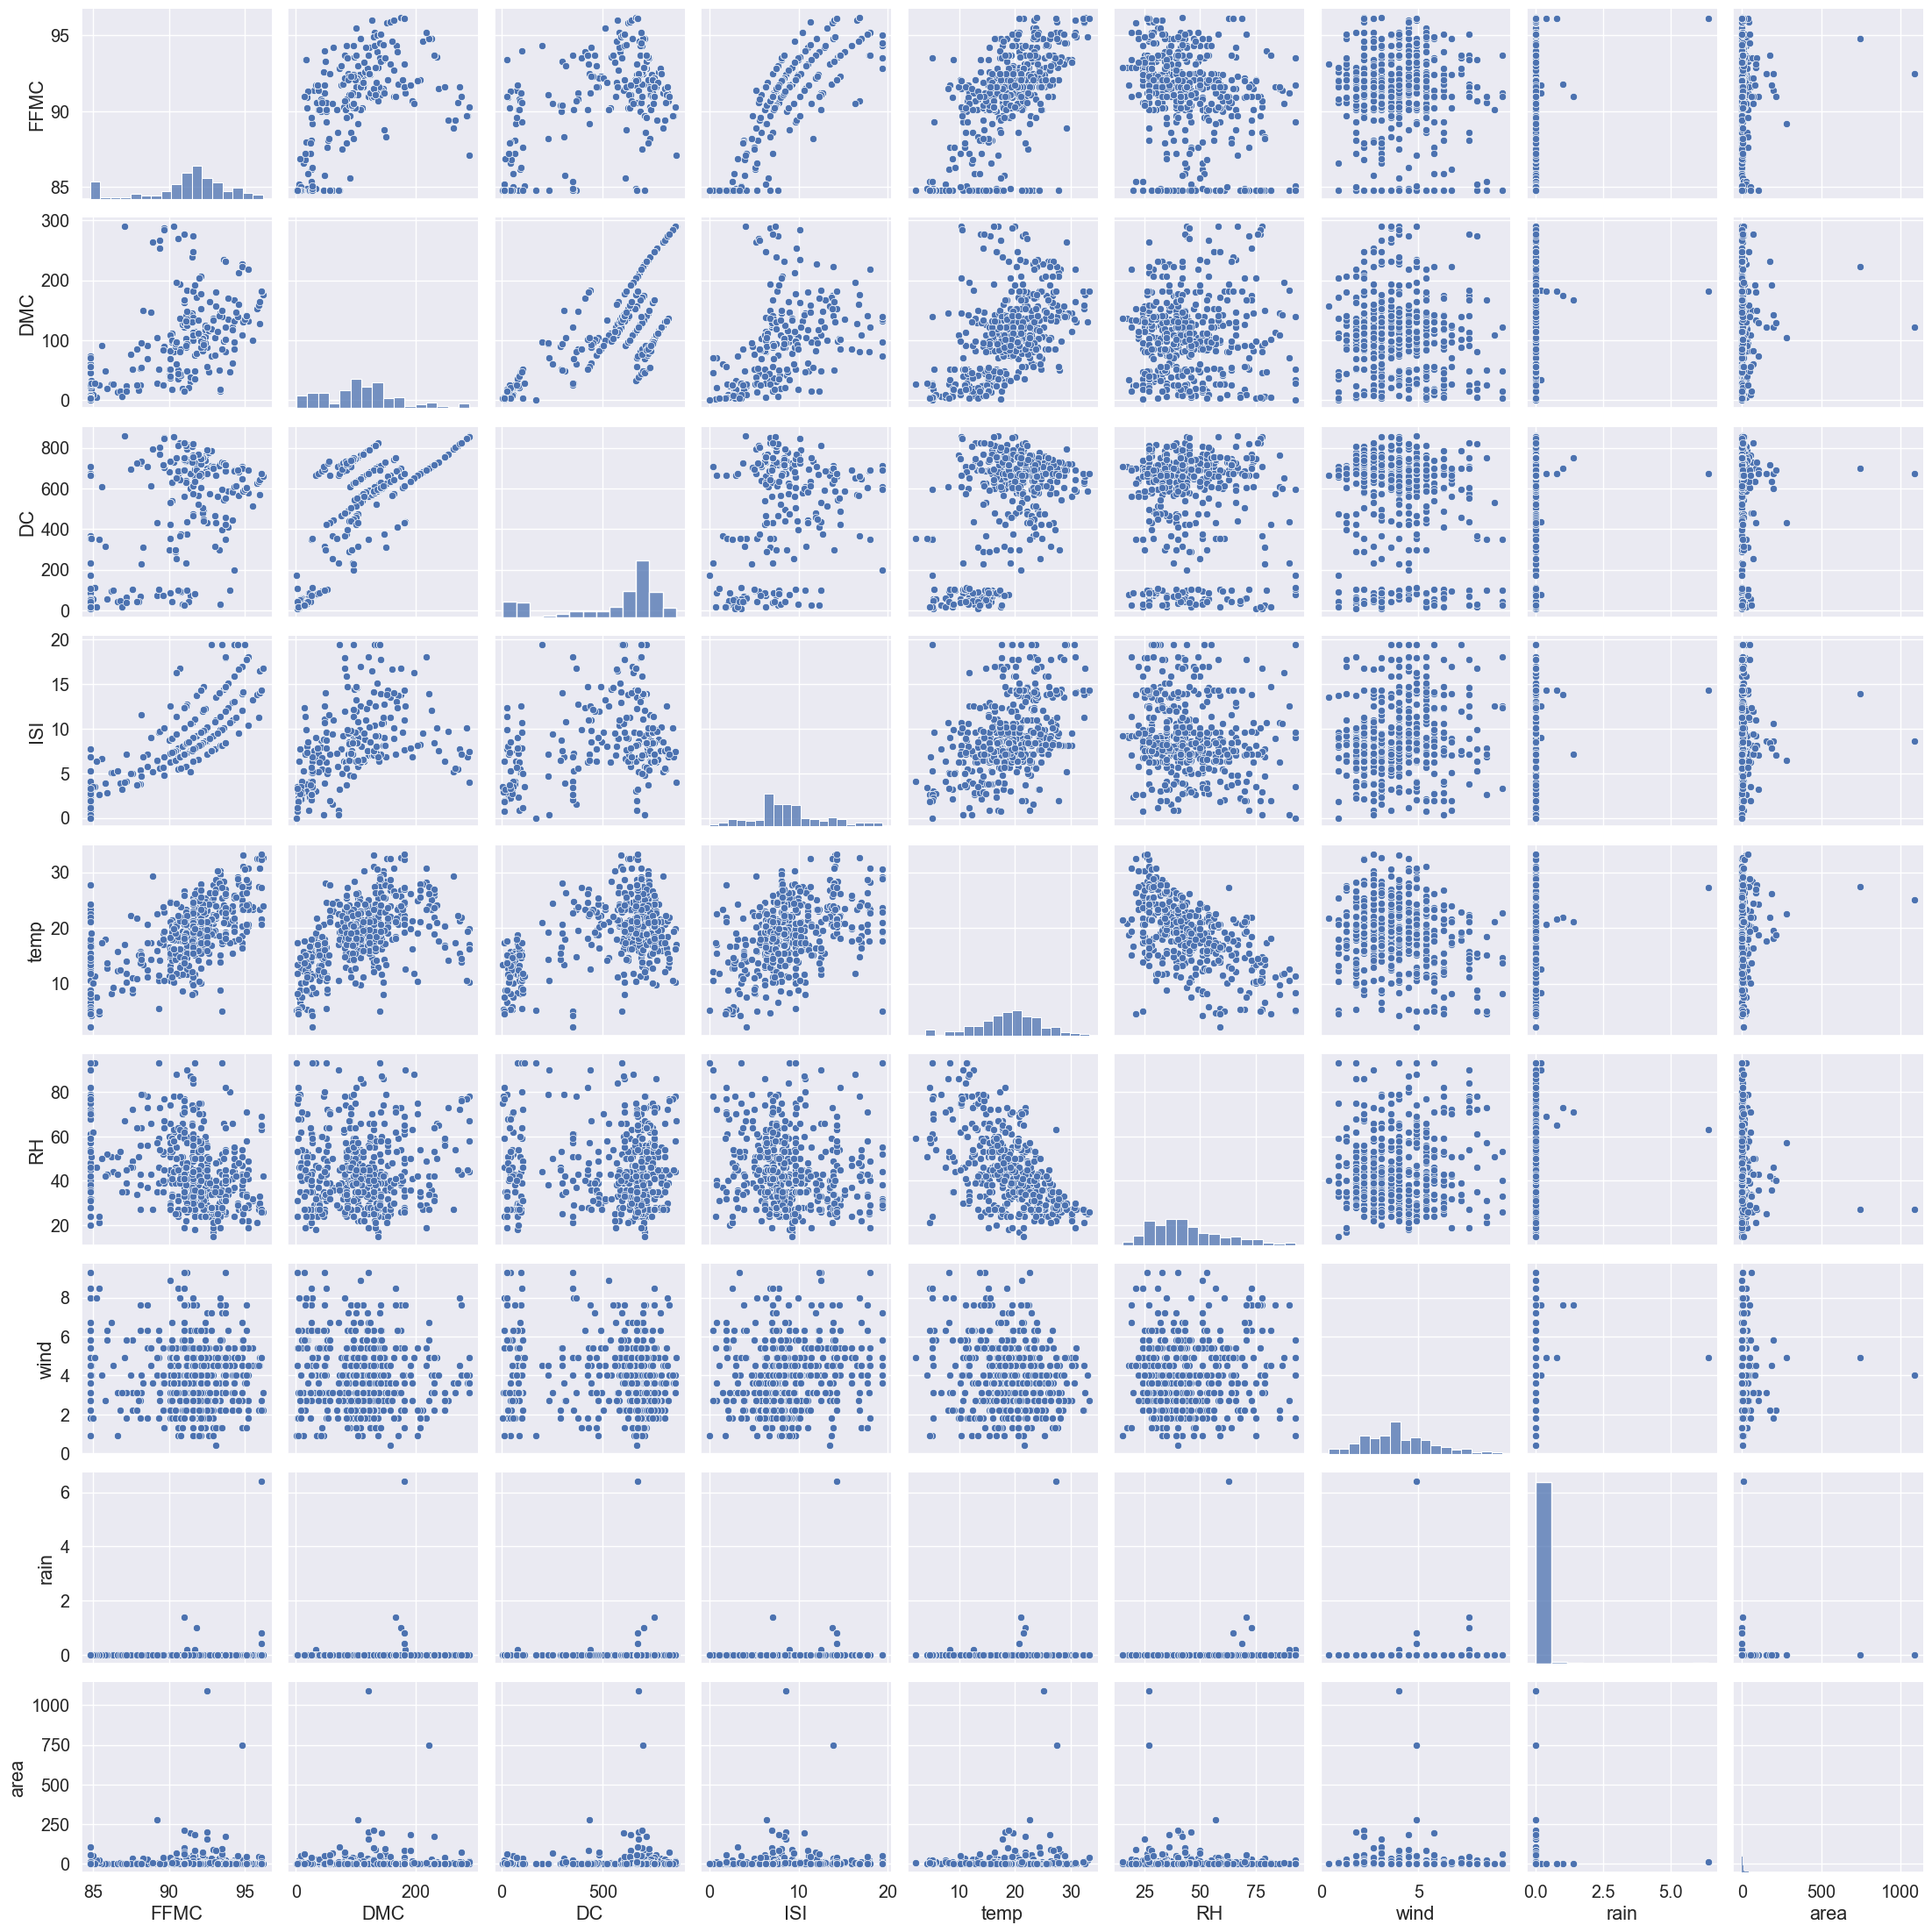

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
# Encoding month and day features
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,93.0,4.0,0.2,0.0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,93.0,1.8,0.0,0.0,small


In [ ]:
# Encoding target variable 'size category'
df.size_category.replace(('small', 'large'), (0, 1), inplace = True)
df.sample(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
293,7,2,93.1,180.4,430.8,11.0,26.9,28.0,5.4,0.0,86.45,1
320,9,4,92.8,119.0,783.5,7.5,18.9,34.0,7.2,0.0,34.36,1
290,7,6,91.6,104.2,474.9,9.0,18.7,53.0,1.8,0.0,0.00,0
5,8,7,92.3,85.3,488.0,14.7,22.2,29.0,5.4,0.0,0.00,0
178,9,3,90.1,82.9,735.7,6.2,18.3,45.0,2.2,0.0,4.88,0


In [ ]:
# data transformaion
#Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop('size_category',axis=1))
scaled_features=scaler.transform(df.drop('size_category',axis=1))
df_1=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-1.968443,0.357721,-1.787970,-1.323432,-1.830477,-0.954047,-1.842640,0.417508,1.500981,-0.073268,-0.202020
1,1.110120,-1.090909,-0.208201,-1.179632,0.488891,-0.554984,-0.153278,-0.695447,-1.743570,-0.073268,-0.202020
2,1.110120,0.840597,-0.208201,-1.049899,0.560715,-0.554984,-0.739383,-0.695447,-1.519808,-0.073268,-0.202020
3,-1.968443,0.357721,0.186742,-1.212456,-1.898266,0.018670,-1.825402,3.014402,-0.009414,0.603155,-0.202020
4,-1.968443,1.323474,-0.674951,-0.931107,-1.798600,0.168319,-1.291012,3.014402,-1.240105,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...
512,0.230531,1.323474,-2.290624,-0.846702,0.474768,-1.752174,1.536084,-0.757278,-0.736641,-0.073268,-0.100753
513,0.230531,1.323474,-2.290624,-0.846702,0.474768,-1.752174,0.519019,1.654124,0.997516,-0.073268,0.651674
514,0.230531,1.323474,-2.290624,-0.846702,0.474768,-1.752174,0.398350,1.592293,1.500981,-0.073268,-0.026532
515,0.230531,0.840597,1.156146,0.549102,0.269382,0.592324,1.156839,-0.138970,-0.009414,-0.073268,-0.202020


In [ ]:
#data partion
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_1,df["size_category"],test_size=0.3,random_state=(42))

In [ ]:
#support Vector machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
# make predictions
prediction = svc.predict(x_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       115
           1       0.89      0.20      0.32        41

    accuracy                           0.78       156
   macro avg       0.83      0.59      0.60       156
weighted avg       0.81      0.78      0.73       156

[[114   1]
 [ 33   8]]
Accuracy: 0.782051282051282
Precision: 0.8888888888888888
Recall: 0.1951219512195122


In [ ]:
svc = SVC(kernel='rbf',gamma='scale', C=1)
svc.fit(x_train, y_train)
# make predictions
pred = svc.predict(x_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       115
           1       0.89      0.20      0.32        41

    accuracy                           0.78       156
   macro avg       0.83      0.59      0.60       156
weighted avg       0.81      0.78      0.73       156

[[114   1]
 [ 33   8]]
Accuracy: 0.782051282051282
Precision: 0.8888888888888888
Recall: 0.1951219512195122


In [ ]:
svc = SVC(kernel='poly',degree=3,gamma="scale",C=1)
svc.fit(x_train, y_train)
# make predictions
pred = svc.predict(x_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       115
           1       0.91      0.24      0.38        41

    accuracy                           0.79       156
   macro avg       0.85      0.62      0.63       156
weighted avg       0.82      0.79      0.75       156

[[114   1]
 [ 31  10]]
Accuracy: 0.782051282051282
Precision: 0.8888888888888888
Recall: 0.1951219512195122


In [ ]:
clf = SVC()
param_grid = [{'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

gsv.best_params_ , gsv.best_score_

svc = SVC(kernel='linear',C=15,degree=3,gamma=50)
svc.fit(x_train, y_train)
# make predictions
prediction = svc.predict(x_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       115
           1       0.97      0.95      0.96        41

    accuracy                           0.98       156
   macro avg       0.98      0.97      0.97       156
weighted avg       0.98      0.98      0.98       156

[[114   1]
 [  2  39]]
Accuracy: 0.9807692307692307
Precision: 0.975
Recall: 0.9512195121951219


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
#prediction
y_pred_test = logreg.predict(x_test)

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       115
           1       0.97      0.95      0.96        41

    accuracy                           0.98       156
   macro avg       0.98      0.97      0.97       156
weighted avg       0.98      0.98      0.98       156

[[114   1]
 [  2  39]]
Accuracy: 0.9807692307692307
Precision: 0.975
Recall: 0.9512195121951219


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

y_pred_test = classifier.predict(x_test)

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       115
           1       0.97      0.95      0.96        41

    accuracy                           0.98       156
   macro avg       0.98      0.97      0.97       156
weighted avg       0.98      0.98      0.98       156

[[114   1]
 [  2  39]]
Accuracy: 0.9807692307692307
Precision: 0.975
Recall: 0.9512195121951219
